**Data Science and Machine Learning Internship Program
Mini Project 1
-
Stock Market Analysis Using Python
Business Scenario
: 
Data Science extracts meaningful insight from chunks of raw data, which is 
useful to 
different business segments for planning their future course of action. Finance is 
probably one of the first to catch on to this trend with a rise in the penetration of analytics into 
many aspects of our lives. Here, we will analyze data from the stock mar
ket for some technology 
stocks such as Apple, Google, Amazon, and Microsoft.
Objective: 
Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze 
the information, visualize it, and look at different ways to analyze the risk of a s
tock, based on its 
performance history.
About the Data: 
The stocks we have chosen are from various industries and market caps namely,
•
Apple
•
Google
•
Microsoft
•
Amazon
For the start, we shall investigate the Amazon stock individually and then move on t
o the 
combined analysis.**

Import the  following libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_datareader.data as web
from datetime import datetime

In [158]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

Import the csv file from the given link and assign the csv File to the specfic variable

---




In [159]:
AMAZON=pd.read_csv("/content/AMZN.csv")
GOOGLE=pd.read_csv("/content/GOOG.csv")
MICROSOFT=pd.read_csv("/content/MSFT.csv")
APPLE=pd.read_csv("/content/AAPL.csv")

We can describe the amazon datasets like min,max,average,etc

In [160]:
AMAZON.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,113.391067,115.326728,111.291734,113.318135,113.318135,7.378074e+07
std,20.898034,21.006854,20.602446,20.759018,20.759018,3.038025e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,96.077501,97.642498,94.232499,96.289999,96.289999,5.497842e+07
50%,110.819999,113.635002,107.690002,110.720249,110.720249,6.588070e+07
75%,124.090122,125.707501,121.418748,124.637499,124.637499,8.372808e+07
max,170.384003,170.831497,167.868500,169.315002,169.315002,2.726620e+08


For Reading identity we add a special column that would help us to identity which dataset represents the specific company

In [161]:
AMAZON['Company_Name']="Amazon"
GOOGLE['Company_Name']="Google"
MICROSOFT['Company_Name']="Microsoft"
APPLE['Company_Name']="Apple"

Merging all the DataFrame into Single DataFrame

In [162]:
AAMG_Stocks=pd.concat([AMAZON,MICROSOFT,APPLE,GOOGLE])
AAMG_Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name
0,2022-03-24,163.749496,164.118500,160.050003,163.649506,163.649506,56798000,Amazon
1,2022-03-25,164.000000,165.368500,162.250000,164.773499,164.773499,49032000,Amazon
2,2022-03-28,164.975006,169.037506,164.899994,168.990494,168.990494,59854000,Amazon
3,2022-03-29,170.384003,170.831497,167.868500,169.315002,169.315002,66154000,Amazon
4,2022-03-30,168.509506,168.950500,165.500000,166.300995,166.300995,56168000,Amazon


Store the Combined DataFrame ina CSV File

In [163]:
AAMG_Stocks.to_csv('AAMG_Stocks.csv')

Check whether the given dataframe contain the null Values

In [164]:
AAMG_Stocks.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Company_Name    0
dtype: int64

In [165]:
AAMG_Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name
0,2022-03-24,163.749496,164.118500,160.050003,163.649506,163.649506,56798000,Amazon
1,2022-03-25,164.000000,165.368500,162.250000,164.773499,164.773499,49032000,Amazon
2,2022-03-28,164.975006,169.037506,164.899994,168.990494,168.990494,59854000,Amazon
3,2022-03-29,170.384003,170.831497,167.868500,169.315002,169.315002,66154000,Amazon
4,2022-03-30,168.509506,168.950500,165.500000,166.300995,166.300995,56168000,Amazon


Check Whetger the given Dataframe cointain the duplicated values

In [166]:
AAMG_Stocks.duplicated().sum()

0

What was the change in stock price over time? 

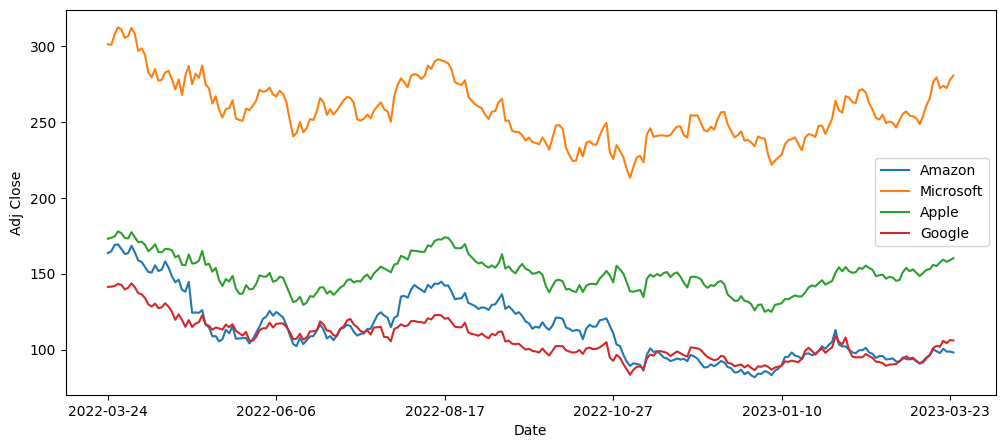

In [167]:
Companies = AAMG_Stocks['Company_Name'].drop_duplicates().values
AAMG1=AAMG_Stocks.copy()
AAMG1.set_index('Date', inplace=True)
grouped = AAMG1.groupby('Company_Name')
fig, ax = plt.subplots()
plt.ylabel('Adj Close')
for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(12,5), ax=ax)
ax.legend(Companies)

Let us look at the price trend of individual stocks

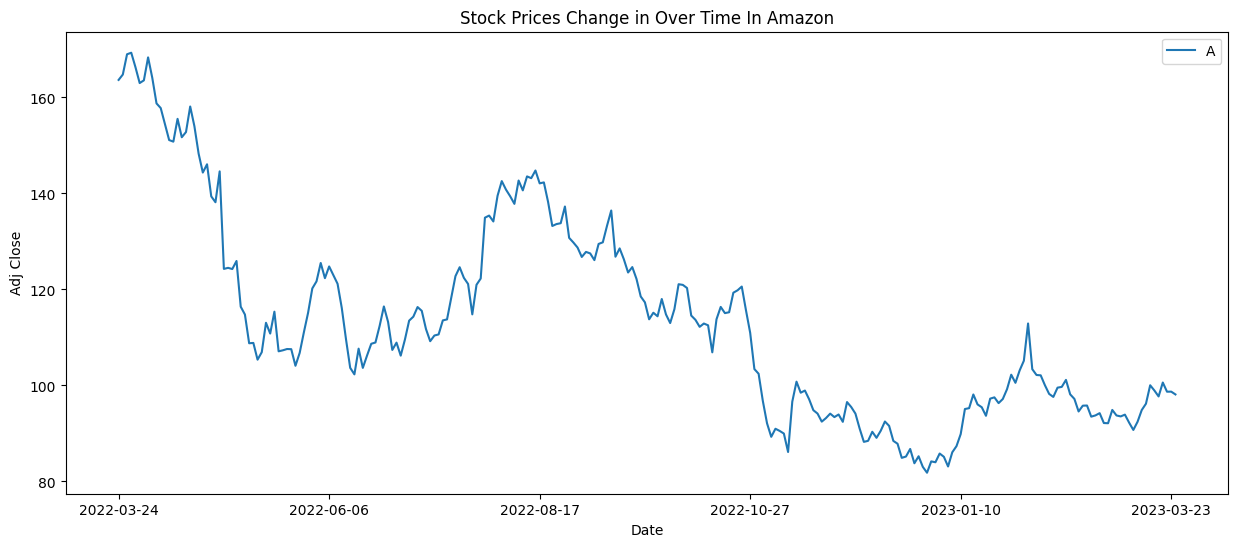

In [168]:
plt.title('Stock Prices Change in Over Time In Amazon')
Amazon=AMAZON.copy()
plt.ylabel('Adj Close')
Amazon.set_index('Date', inplace=True)
Amazon['Adj Close'].plot(legend=True,figsize=(15,6))
plt.legend("Amazon")

Visualize the change in a stock’s volume being traded, over time.


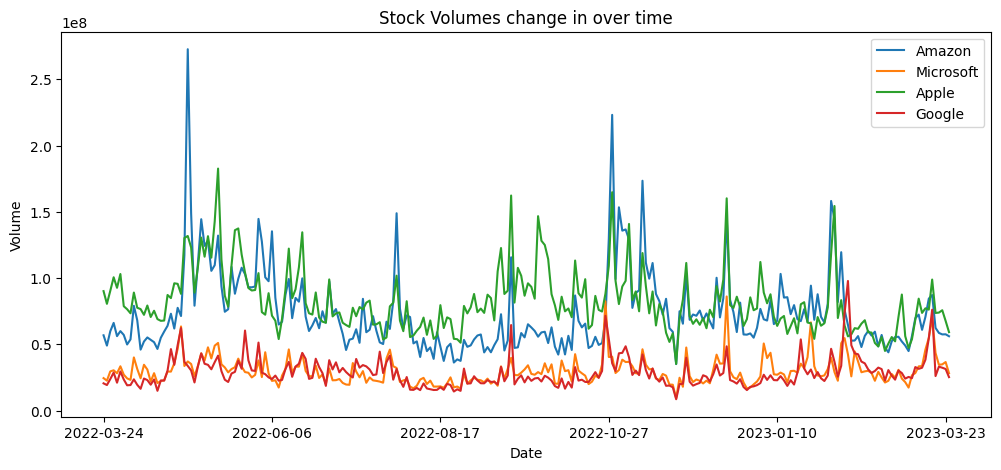

In [169]:
fig, ax = plt.subplots()
AAMG2=AAMG_Stocks.copy()
AAMG2.set_index('Date', inplace=True)
plt.title('Stock Volumes change in over time')
plt.xlabel('Date')
plt.ylabel('Volume')
for Company in Companies:
    stock = grouped.get_group(Company)
    stock['Volume'].plot(legend=True,figsize=(12,5), ax=ax)
ax.legend(Companies)
plt.show()

In [170]:
# To check whether the original data frame is changed or not.
AAMG_Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name
0,2022-03-24,163.749496,164.118500,160.050003,163.649506,163.649506,56798000,Amazon
1,2022-03-25,164.000000,165.368500,162.250000,164.773499,164.773499,49032000,Amazon
2,2022-03-28,164.975006,169.037506,164.899994,168.990494,168.990494,59854000,Amazon
3,2022-03-29,170.384003,170.831497,167.868500,169.315002,169.315002,66154000,Amazon
4,2022-03-30,168.509506,168.950500,165.500000,166.300995,166.300995,56168000,Amazon



Visualize the change in a stock's volume being traded over time in one stock like Amazon

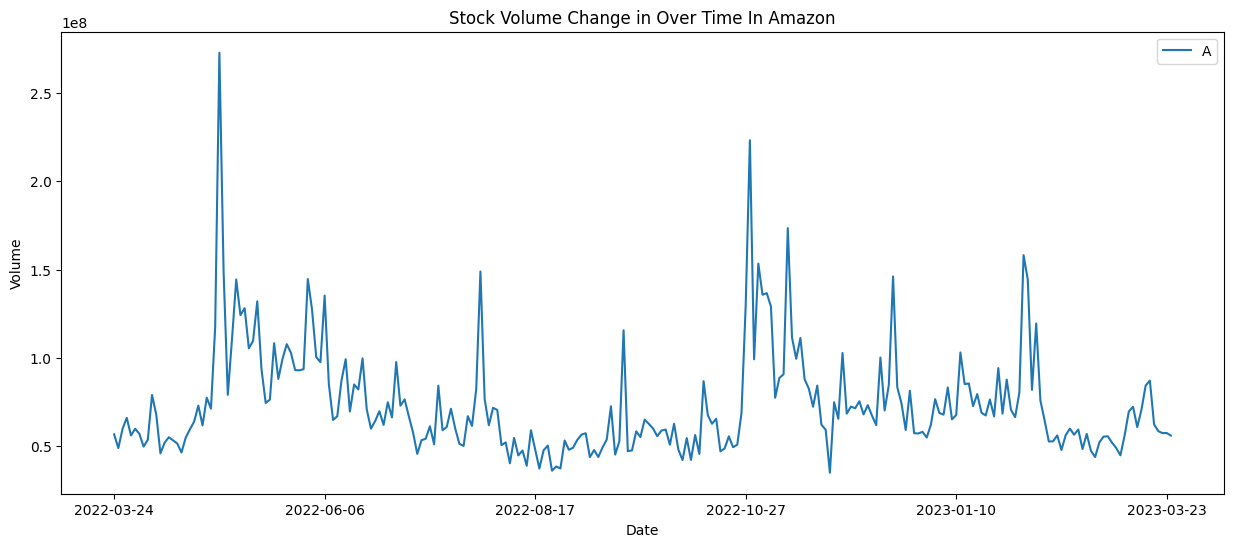

In [182]:
plt.title('Stock Volume Change in Over Time In Amazon')
Amazon=AMAZON.copy()
Amazon.set_index('Date', inplace=True)
plt.xlabel('Date')
plt.ylabel('Volume')
Amazon['Volume'].plot(legend=True,figsize=(15,6))
plt.legend("Amazon")

What was the moving average of various stocks?

In [172]:
Moving_average=[25,50,100]
for ma in Moving_average:
    column_name = "Moving_Average for %s days" %(str(ma))
    AMAZON[column_name] = AMAZON['Adj Close'].rolling(window=ma,center=False).mean()
AMAZON.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name,Moving_Average for 25 days,Moving_Average for 50 days,Moving_Average for 100 days
247,2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900,Amazon,95.4816,96.7814,94.6581
248,2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300,Amazon,95.5244,97.0720,94.4582
249,2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400,Amazon,95.4844,97.2988,94.2886
250,2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300,Amazon,95.3864,97.4756,94.1661
251,2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400,Amazon,95.3856,97.5364,94.1133


Text(0, 0.5, 'Moving Average')

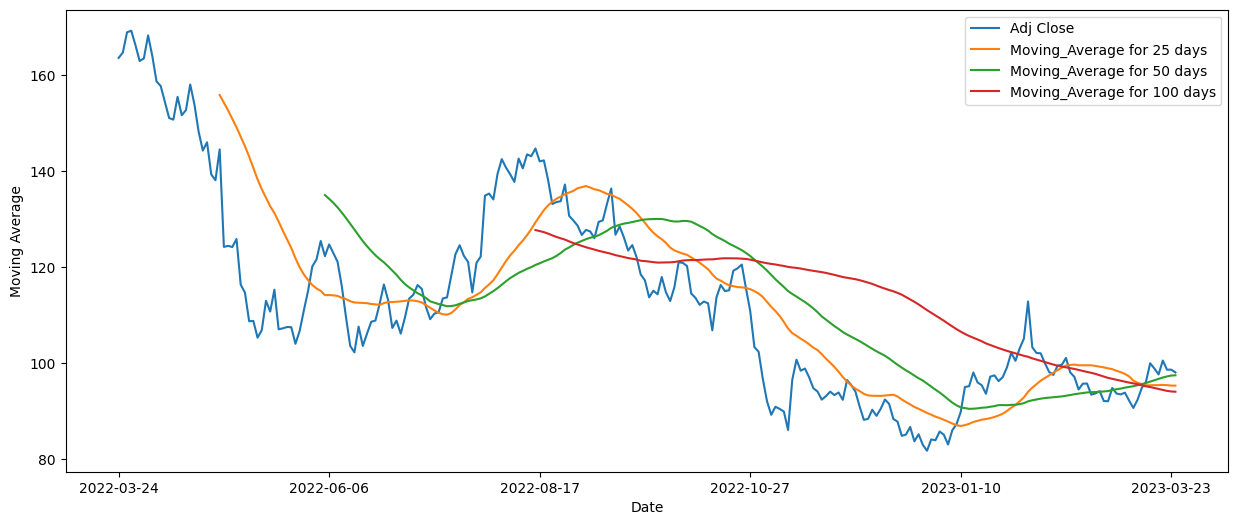

In [173]:
Amazon=AMAZON.copy()
Amazon.set_index('Date', inplace=True)
Amazon[['Adj Close','Moving_Average for 25 days','Moving_Average for 50 days','Moving_Average for 100 days']].plot(subplots=False,figsize=(15,6))
plt.ylabel('Moving Average')

What was the daily return average of a stock?

<Axes: xlabel='Date', ylabel='Daily Return'>

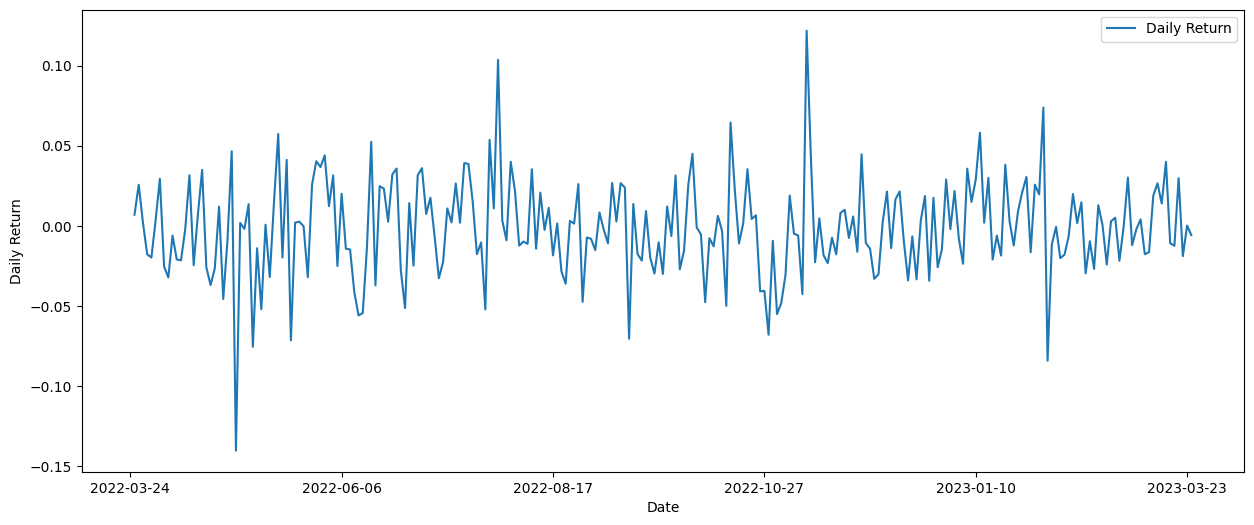

In [174]:
Amazon=AMAZON.copy()
Amazon.set_index('Date', inplace=True)
plt.ylabel('Daily Return')
Amazon['Daily Return'] = Amazon['Adj Close'].pct_change()
Amazon['Daily Return'].plot(figsize=(15,6),legend=True)

In [175]:
avg_daily_return = Amazon['Daily Return'].mean()
print(avg_daily_return)

-0.0015767882674971791


Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [176]:
def assign_trend(daily_return):
    if daily_return > 0.005:
        return 'Upward'
    elif daily_return < -0.005:
        return 'Downward'
    elif abs(daily_return) <= 0.005:
        return 'Stable'
    else:
        return 'Uncertain'
Amazon['Trend'] = Amazon['Daily Return'].apply(assign_trend)


Visualize trend frequency through a Pie Chart.

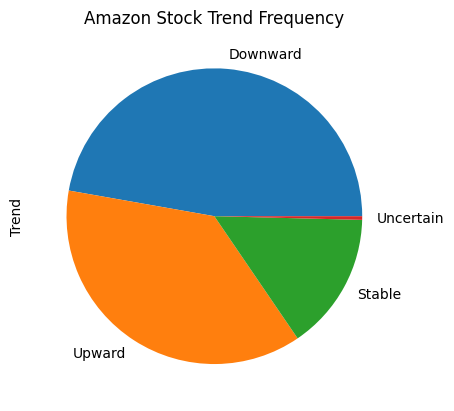

In [177]:
trend_freq = Amazon['Trend'].value_counts()
trend_freq.plot.pie()
plt.title('Amazon Stock Trend Frequency')
plt.show()


What was the correlation between the daily returns of 
different stocks?

In [178]:
All_adjacent = pd.concat([ APPLE['Adj Close'],GOOGLE['Adj Close'],AMAZON['Adj Close'],MICROSOFT['Adj Close']], axis = 1)
All_adjacent.columns = ['Apple','Google','Amazon','Microsoft']
All_adjacent

,Apple,Google,Amazon,Microsoft
0,173.021881,141.311996,163.649506,301.145691
1,173.667969,141.521500,164.773499,300.729736
2,174.542694,141.949997,168.990494,307.681549
3,177.882431,143.250000,169.315002,312.345795
4,176.699615,142.644501,166.300995,310.810852
...,...,...,...,...
247,157.399994,101.930000,97.709999,272.230011
248,159.279999,105.839996,100.610001,273.779999
249,157.830002,104.220001,98.699997,272.290009
250,158.929993,106.260002,98.709999,277.660004


In [179]:
Daily_returns=All_adjacent.pct_change()
Daily_returns

,Apple,Google,Amazon,Microsoft
0,NaN,NaN,NaN,NaN
1,0.003734,0.001483,0.006868,-0.001381
2,0.005037,0.003028,0.025593,0.023116
3,0.019134,0.009158,0.001920,0.015159
4,-0.006649,-0.004227,-0.017801,-0.004914
...,...,...,...,...
247,0.015484,-0.005173,-0.012532,-0.025767
248,0.011944,0.038360,0.029680,0.005694
249,-0.009103,-0.015306,-0.018984,-0.005442
250,0.006969,0.019574,0.000101,0.019722


<Axes: >

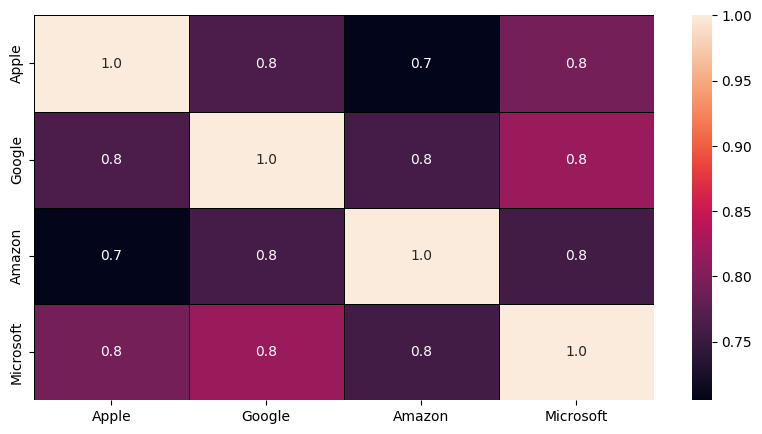

In [180]:
f,ax=plt.subplots(figsize=(10,5))
sb.heatmap(Daily_returns.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax) 